# Importing the dataset

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

"Done Import"

'Done Import'

In [29]:
file_path = "../melb_data.csv"
melb_data = pd.read_csv(file_path)

melb_data.shape

(13580, 21)

We have about 13 thousand entries (rows) with 21 variables (columns)

In [30]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


The describe() method in pandas gives us various summary statistics. It returns the count, mean, standard deviation, min and max values of the data.

In [31]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Here we can see that only some variables have null values

# Picking the important features

In [32]:
pd.set_option("display.max_columns", 22)
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [53]:
melb_features = ["Rooms", "Bathroom", "Landsize", "Lattitude", "Longtitude", "Price"]

house = melb_data.loc[:5000, melb_features]
house

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Price
0,2,1.0,202.0,-37.7996,144.9984,1480000.0
1,2,1.0,156.0,-37.8079,144.9934,1035000.0
2,3,2.0,134.0,-37.8093,144.9944,1465000.0
3,3,2.0,94.0,-37.7969,144.9969,850000.0
4,4,1.0,120.0,-37.8072,144.9941,1600000.0
...,...,...,...,...,...,...
4996,3,1.0,495.0,-37.7521,145.0114,890000.0
4997,2,1.0,266.0,-37.7423,145.0105,790000.0
4998,3,1.0,621.0,-37.7415,145.0084,1000000.0
4999,2,2.0,415.0,-37.7481,145.0017,860000.0


In [54]:
melb_data[melb_features].nunique()

Rooms            9
Bathroom         9
Landsize      1448
Lattitude     6503
Longtitude    7063
Price         2204
dtype: int64

In [55]:
house.isnull().sum()

Rooms         0
Bathroom      0
Landsize      0
Lattitude     0
Longtitude    0
Price         0
dtype: int64

In [72]:
house.Price.describe()

count    5.001000e+03
mean     1.137344e+06
std      6.715625e+05
min      8.500000e+04
25%      6.800000e+05
50%      9.500000e+05
75%      1.417000e+06
max      6.500000e+06
Name: Price, dtype: float64

In [74]:
house.Landsize.describe()

count     5001.000000
mean       456.715057
std       1343.488121
min          0.000000
25%        145.000000
50%        348.000000
75%        619.000000
max      75100.000000
Name: Landsize, dtype: float64

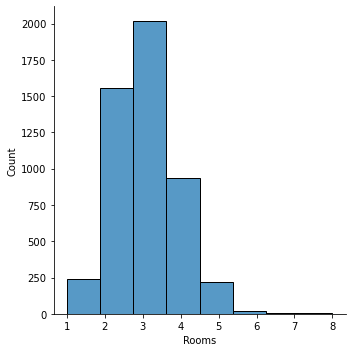

In [56]:
sns.displot(house["Rooms"], bins=house.Rooms.nunique())

In [57]:
house.Rooms.value_counts()

3    2017
2    1556
4     935
1     241
5     222
6      22
8       4
7       4
Name: Rooms, dtype: int64

In [58]:
corelation = house.corr()

<AxesSubplot:>

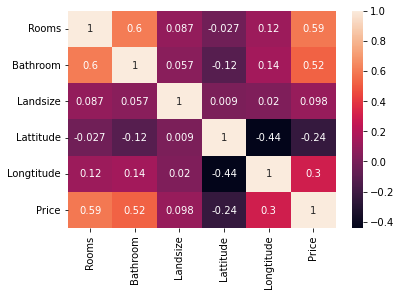

In [59]:
sns.heatmap(corelation,
            annot = True)

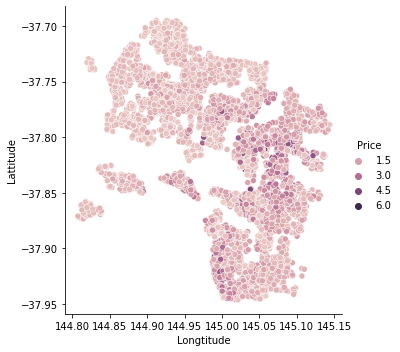

In [61]:
sns.relplot(x="Longtitude", y="Lattitude", hue="Price", data=house)

<AxesSubplot:xlabel='Price', ylabel='Landsize'>

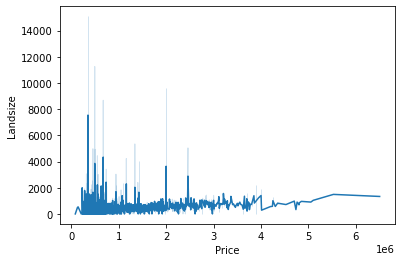

In [67]:
sns.lineplot(x="Price", y="Landsize", data=house)

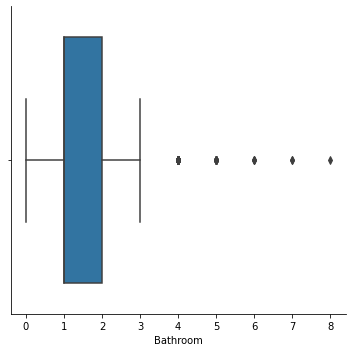

In [27]:
sns.catplot(x="Bathroom", kind="box", data=house)

In [37]:
house.Bathroom.value_counts()

1.0    2804
2.0    1762
3.0     357
4.0      43
0.0      16
5.0      13
6.0       3
7.0       2
8.0       1
Name: Bathroom, dtype: int64

<AxesSubplot:xlabel='Price'>

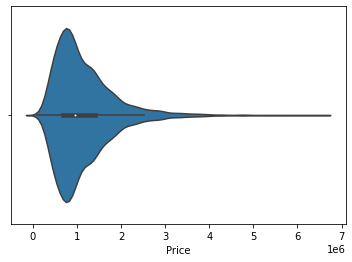

In [45]:
sns.violinplot(x=house["Price"])

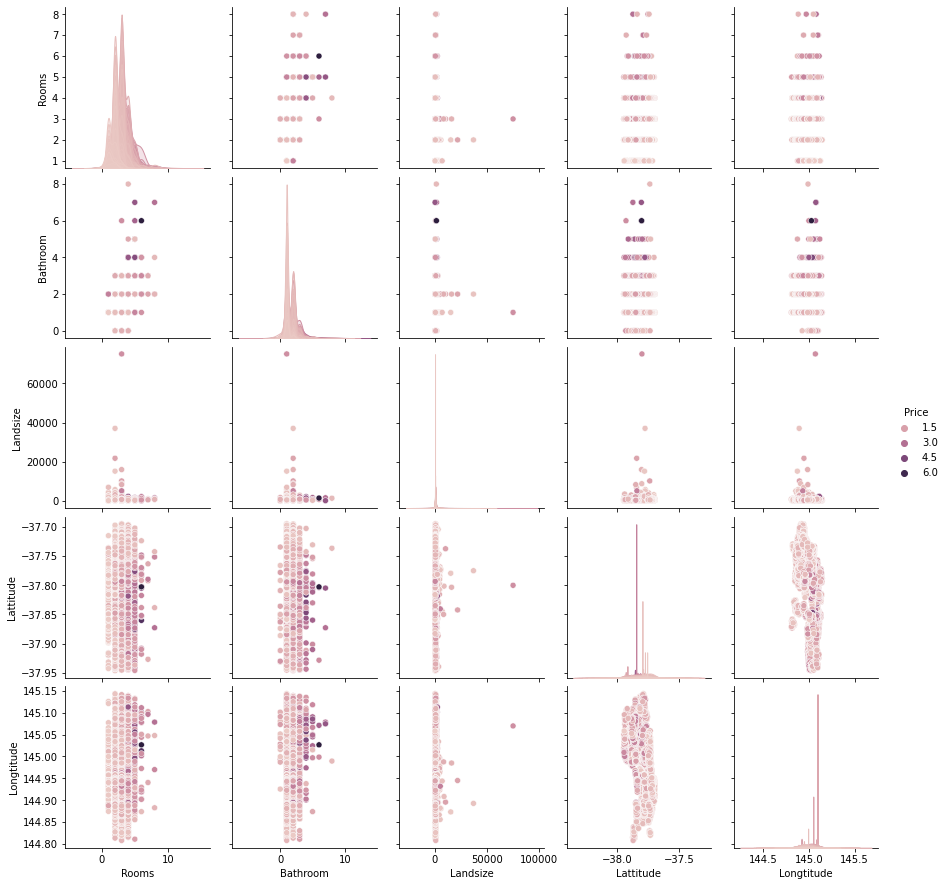

In [60]:
sns.pairplot(house, hue="Price")